# **Final Project KreditYuk - Loan Prediction Based on Customer Behavior**

# Stage 1 - Exploratory Data Analysis, Insights & Visualization

## 1. Import Data and Library



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from matplotlib import rcParams
sns.set(style="darkgrid")

rcParams['figure.figsize'] = 12,6
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Final Project KreditYuk/Stage 1/Training Data.csv')
#data = pd.read_csv('Training Data.csv')
df = data

In [ ]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Final Project KreditYuk/Stage 1/Test Data.csv')
df_1 = pd.read_csv('/content/drive/MyDrive/Final Project KreditYuk/Stage 1/Sample Prediction Dataset.csv')
df_2 = pd.read_csv('/content/drive/MyDrive/Final Project KreditYuk/Stage 1/Training Data.csv')

## 2. Descriptive Statistics

In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [ ]:
df.describe()

,ID,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
count,28000.000000,2.800000e+04,28000.000000,28000.000000,28000.000000,28000.000000
mean,14000.500000,5.029563e+06,50.054679,10.120393,6.339286,11.991786
std,8083.048105,2.864938e+06,17.129879,6.027317,3.645222,1.397754
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000
25%,7000.750000,2.545414e+06,35.000000,5.000000,3.000000,11.000000
50%,14000.500000,5.046744e+06,50.000000,10.000000,6.000000,12.000000
75%,21000.250000,7.474639e+06,65.000000,15.000000,9.000000,13.000000
max,28000.000000,9.999814e+06,79.000000,20.000000,14.000000,14.000000


In [ ]:
df_2.isna().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [ ]:
df_2.duplicated().sum()

0

## 3. Data Snippet

In [ ]:
df_2.sample(5)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
45547,45548,9749313,72,17,single,rented,yes,Aviator,Medininagar,Jharkhand,14,11,1
141118,141119,6894156,53,4,single,rented,no,Web_designer,Hubliâ€“Dharwad,Karnataka,4,10,0
177144,177145,6652382,35,13,single,rented,yes,Fashion_Designer,Durgapur,West_Bengal,7,14,0
7829,7830,3907141,24,15,single,rented,no,Magistrate,Kishanganj[35],Bihar,11,12,0
140500,140501,6045182,78,6,single,rented,no,Designer,Raichur,Karnataka,6,12,0


In [ ]:
NPL = df_2[df_2['Risk_Flag']==1]
NPL.sample(5)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
172953,172954,7743419,71,15,single,rented,no,Scientist,Nangloi_Jat,Delhi,14,14,1
4182,4183,4088166,40,7,single,rented,no,Architect,Dhule,Maharashtra,7,14,1
221172,221173,9473221,71,0,single,rented,yes,Industrial_Engineer,Ujjain,Madhya_Pradesh,0,14,1
35203,35204,413811,78,6,single,rented,yes,Magistrate,Akola,Maharashtra,6,11,1
227393,227394,1611240,72,19,single,rented,no,Hotel_Manager,Aurangabad[39],Bihar,6,10,1


In [ ]:
NPL["Potential_loss"] = NPL["Income"]*0.1

NPL["Potential_loss"].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


15415423053.7

## 4. Grouping by Data Varibale Type

In [ ]:
nums = ['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']
cats = ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE']

In [ ]:
df_2[nums].describe()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
count,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000
mean,4.997117e+06,49.954071,10.084437,6.333877,11.997794
std,2.878311e+06,17.063855,6.002590,3.647053,1.399037
min,1.031000e+04,21.000000,0.000000,0.000000,10.000000
25%,2.503015e+06,35.000000,5.000000,3.000000,11.000000
50%,5.000694e+06,50.000000,10.000000,6.000000,12.000000
75%,7.477502e+06,65.000000,15.000000,9.000000,13.000000
max,9.999938e+06,79.000000,20.000000,14.000000,14.000000


In [ ]:
df_2[cats].describe()

,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE
count,252000,252000,252000,252000,252000,252000
unique,2,3,2,51,317,29
top,single,rented,no,Physician,Vijayanagaram,Uttar_Pradesh
freq,226272,231898,176000,5957,1259,28400


## 5. Value Counting

In [ ]:
for col in cats:
    print(f'''Value count kolom {col}: ''')
    print(df_2[col].value_counts())
    print()

Value count kolom Married/Single: 
single     226272
married     25728
Name: Married/Single, dtype: int64

Value count kolom House_Ownership: 
rented          231898
owned            12918
norent_noown      7184
Name: House_Ownership, dtype: int64

Value count kolom Car_Ownership: 
no     176000
yes     76000
Name: Car_Ownership, dtype: int64

Value count kolom Profession: 
Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166
Flight_attendant            

## 6. Descriptive Statistics Summary

1. Dataset terdiri dari 252000 baris.
2. Semua tipe data, nama kolom, dan isinya sudah sesuai
3. Tidak ada null/missing values pada semua kolom.
4. Tidak ada duplicate data antar baris.
5. Semua kolom numerikal memliki perbedaan nilai yang tidak terlalu jauh antara mean dan mediannya (hampir simetris/ normal).
6. Semua kolom numerikal memiliki nilai summary yang sesuai dan wajar (tidak aneh).
7. Kolom Profession, CITY, dan STATE memiliki unique distinct values yang banyak (high cardinality).
8. Nilai data kategorik pada kolom Married/Single, House_Ownership , dan Car_Ownership didominasi oleh orang yang berstatus single, rented, dan no car ownership (lebih dari 50% dari jumlah baris data).
9. Frekuensi dari nilai yang paling umum pada kolom Married/Single dan House_Ownership terlalu timpang (90% dari jumlah data).


## 7. Univariate Analysis

In [ ]:
df_3 = df_2.copy()

In [ ]:
df_3.drop(['Id', 'Risk_Flag'], axis=1, inplace=True)

In [ ]:
df_3.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14


In [ ]:
from sklearn.preprocessing import MinMaxScaler
df_3['Income_std'] = MinMaxScaler().fit_transform(df_3['Income'].values.reshape(len(df_3),1))
df_3[['Income','Income_std']].describe()

,Income,Income_std
count,2.520000e+05,252000.000000
mean,4.997117e+06,0.499198
std,2.878311e+06,0.288130
min,1.031000e+04,0.000000
25%,2.503015e+06,0.249529
50%,5.000694e+06,0.499557
75%,7.477502e+06,0.747495
max,9.999938e+06,1.000000


### 7.1 Box Plot

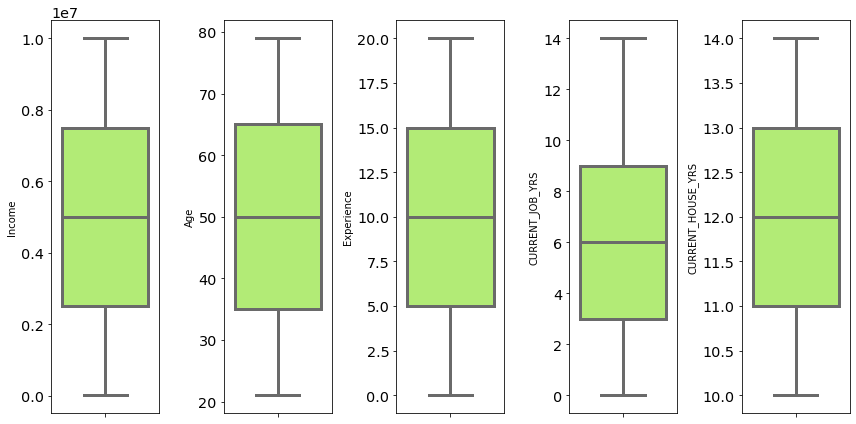

In [ ]:
features = nums
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df_3[features[i]], color='#B2FF62', orient='v')
    plt.tight_layout()

Untuk boxplot, yang perlu diperhatikan adalah outlier:
- Outlier tidak terlihat di semua kolom

### 7.2 Dist Plot

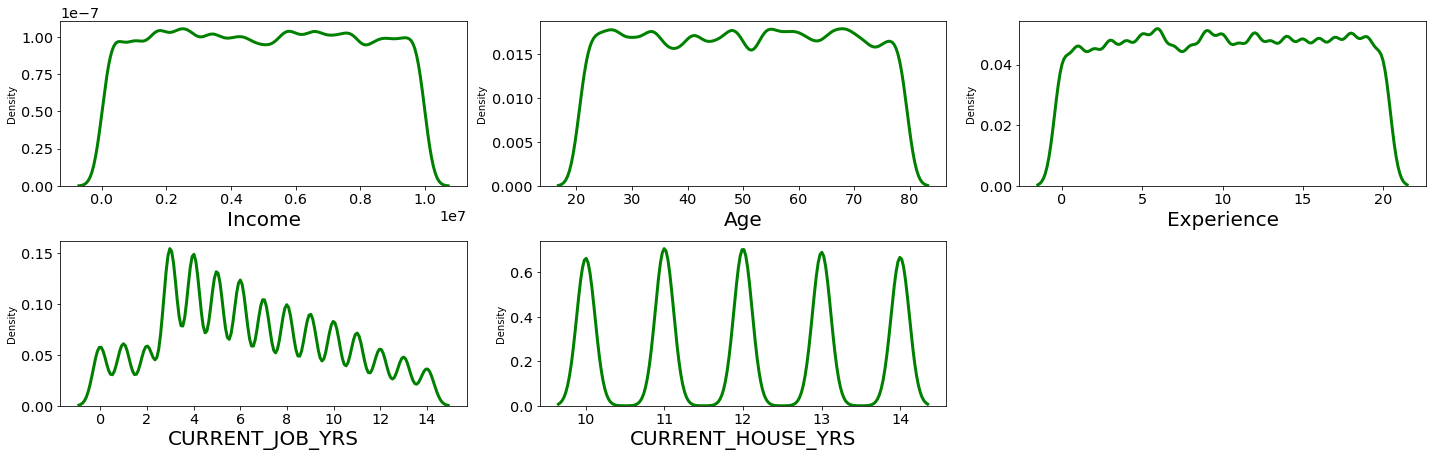

In [ ]:
features = nums
plt.figure(figsize=(20, 15))
for i in range(0,len(features)):
    plt.subplot(5,3, i+1)
    sns.kdeplot(x=df_3[features[i]], color='green')
    plt.xlabel(features[i], size=20)
    plt.tight_layout()

Untuk distribution plot, yang harus diperhatikan adalah bentuk distribusi:
1. Numerical value pada features mendekati distribusi normal, tapi perlu di perhatikan lagi untuk current_house_yrs karna bentuknya yang berbeda

### 7.3 Count Plot

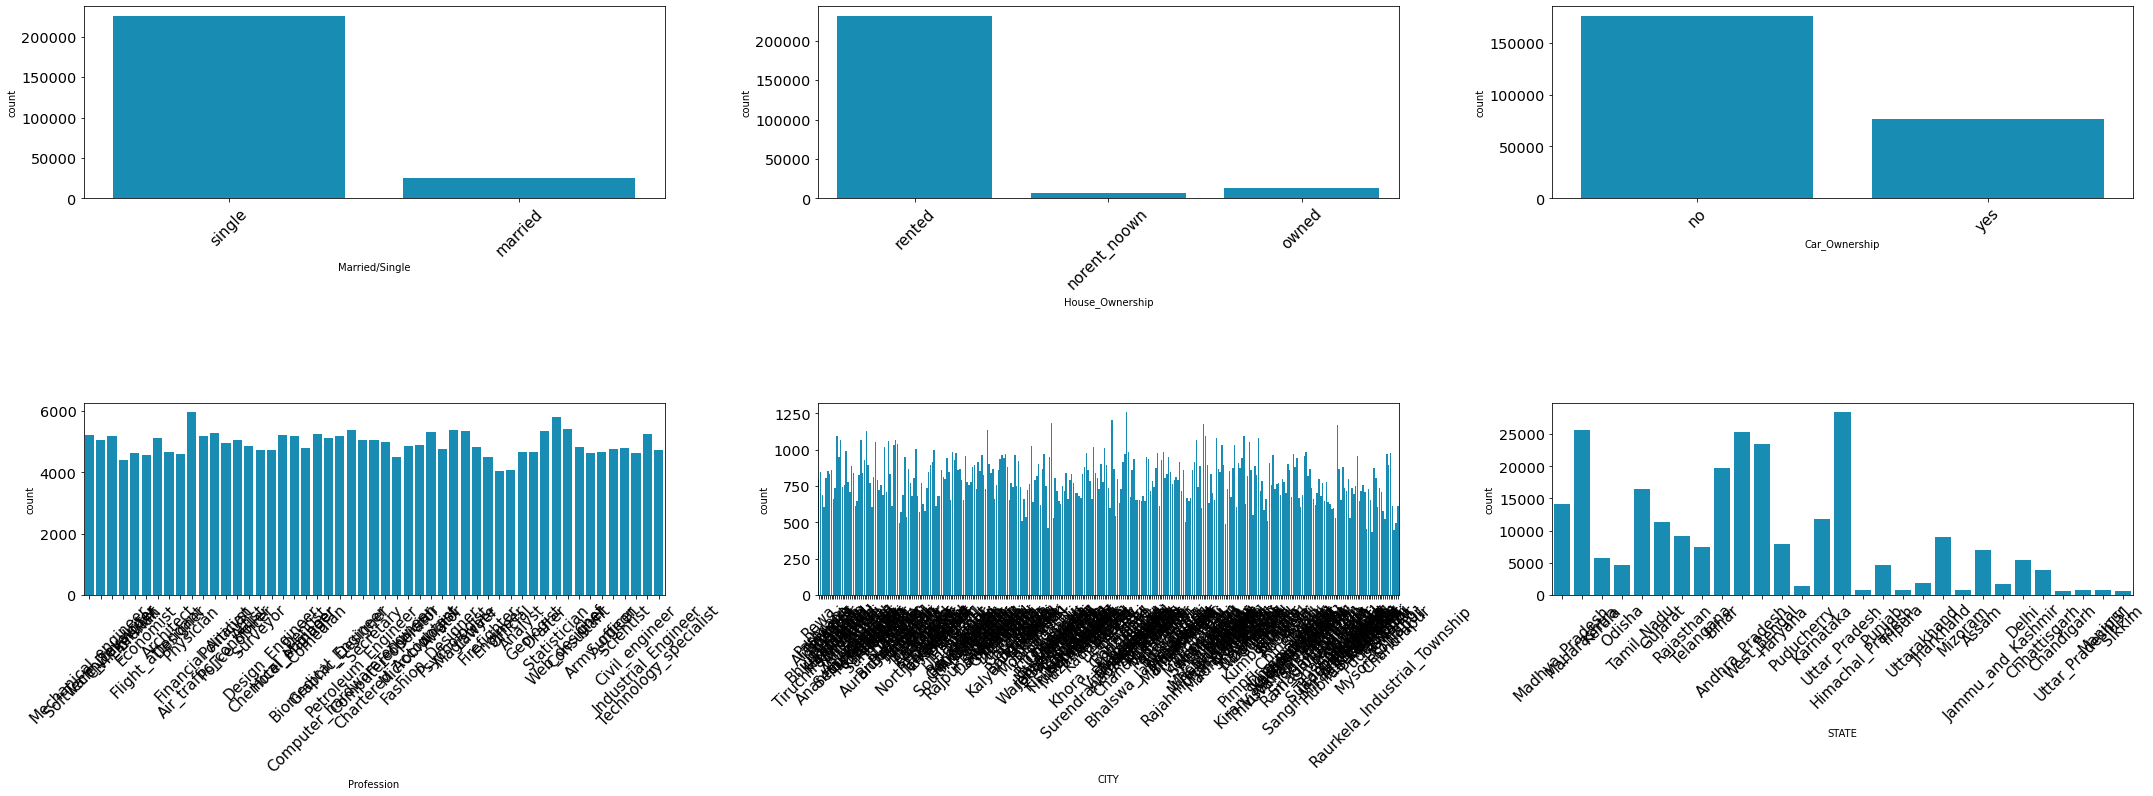

In [ ]:
df_sample = df.sample(1000, random_state=44)
plt.figure(figsize=(30,25))
for i in range(0, len(cats)):
    plt.subplot(5, 3, i+1)
    sns.countplot(x=df_3[cats[i]], color='#0099cc', orient='v')
    plt.xticks(fontsize=15, rotation=45)
    plt.tight_layout()

### 7.4 Koreksi grafik countplot pada fitur kategorikal (dibuat berdasarkan 10 kategori nilai yang terbesar)

#### 7.4.1 Profession

In [ ]:
df_3 = df_2.groupby('Profession')['Id'].count().sort_values(ascending=False).reset_index()
df_3 = df_3.drop(df_3.index[10:])
df_3

,Profession,Id
0,Physician,5957
1,Statistician,5806
2,Web_designer,5397
3,Psychologist,5390
4,Computer_hardware_engineer,5372
5,Drafter,5359
6,Magistrate,5357
7,Fashion_Designer,5304
8,Air_traffic_controller,5281
9,Comedian,5259


Text(42.125, 0.5, 'count')

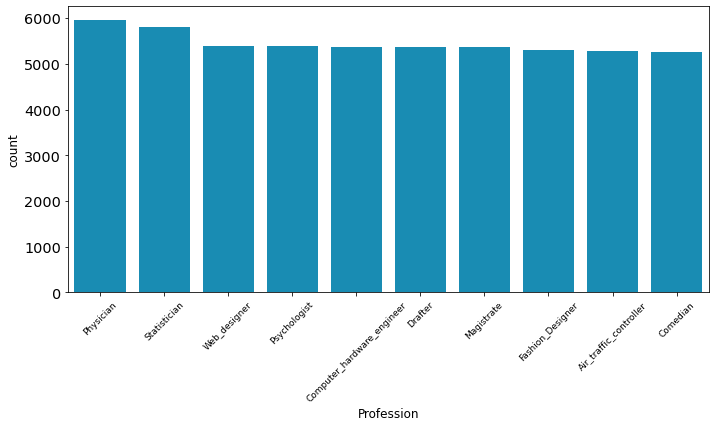

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'Profession', y = 'Id', data = df_3, color='#0099cc', orient='v')
plt.xticks(fontsize=9, rotation=45)
plt.tight_layout()
plt.xlabel('Profession', fontsize = 12)
plt.ylabel('count', fontsize = 12)

#### 7.4.2 CITY

In [ ]:
df_4 = df_2.groupby('CITY')['Id'].count().sort_values(ascending=False).reset_index()
df_4 = df_4.drop(df_4.index[10:])
df_4

,CITY,Id
0,Vijayanagaram,1259
1,Bhopal,1208
2,Bulandshahr,1185
3,Saharsa[29],1180
4,Vijayawada,1172
5,Srinagar,1136
6,Indore,1130
7,New_Delhi,1098
8,Hajipur[31],1098
9,Satara,1096


Text(42.125, 0.5, 'count')

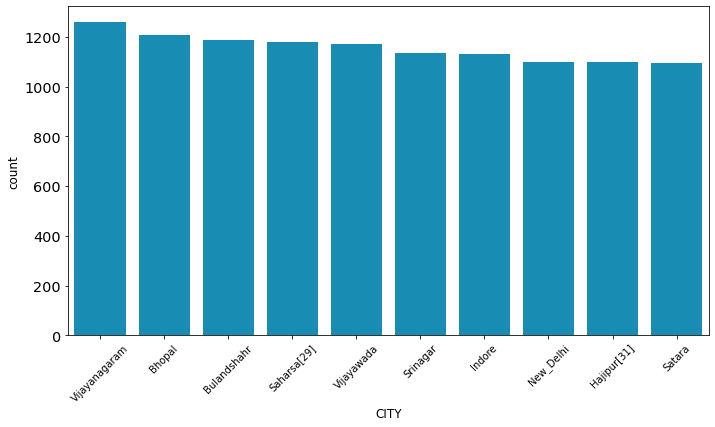

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'CITY', y = 'Id', data = df_4, color='#0099cc', orient='v')
plt.xticks(fontsize=10, rotation=45)
plt.tight_layout()
plt.xlabel('CITY', fontsize = 12)
plt.ylabel('count', fontsize = 12)

#### 7.4.3 STATE

In [ ]:
df_5 = df_2.groupby('STATE')['Id'].count().sort_values(ascending=False).reset_index()
df_5 = df_5.drop(df_5.index[10:])
df_5

,STATE,Id
0,Uttar_Pradesh,28400
1,Maharashtra,25562
2,Andhra_Pradesh,25297
3,West_Bengal,23483
4,Bihar,19780
5,Tamil_Nadu,16537
6,Madhya_Pradesh,14122
7,Karnataka,11855
8,Gujarat,11408
9,Rajasthan,9174


Text(32.875, 0.5, 'count')

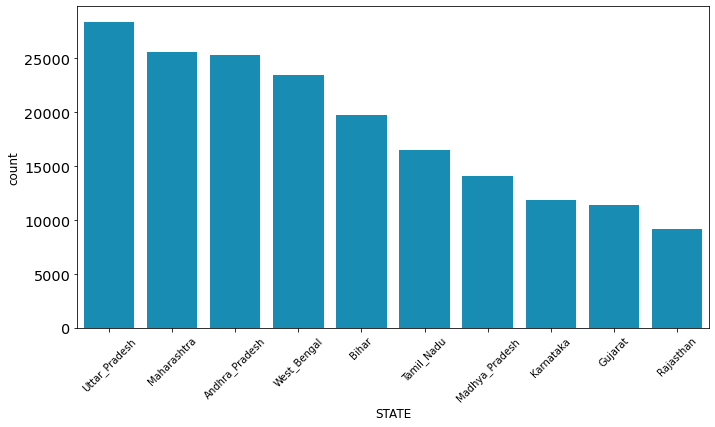

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'STATE', y = 'Id', data = df_5, color='#0099cc', orient='v')
plt.xticks(fontsize=10, rotation=45)
plt.tight_layout()
plt.xlabel('STATE', fontsize = 12)
plt.ylabel('count', fontsize = 12)

### 7.5. Univariate Analysis Summary

1. Semua kolom tidak memiliki outlier.
2. Kolom Income, Age, dan Experience distribusinya normal.
3. Kolom CURRENT_JOB_YRS dan CURRENT_HOUSE_YRS distribusinya multimodal.
4. Kolom Married/Single memiliki nilai yang mendominasi yaitu pada kategori ‘single’.
5. Kolom House_Ownership memiliki nilai yang mendominasi yaitu pada kategori ‘rented’.
6. Kolom Car_Ownership memiliki nilai yang mendominasi pada kategori ‘no’.
7. Kolom Profession, City, dan STATE memiliki kategori yang terlalu banyak (high cardinality).
8. Feature Income memiliki data dengan skala jauh lebih besar dibanding dengan data lainnya, maka perlu dilakukan normalisasi data.

## 8. Multivariate Analysis

### 8.1 Correlation Heatmap

In [ ]:
df_2.corr()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,1.000000,-0.001324,-0.001816,-0.005810,-0.003250,0.001972,0.032153
Income,-0.001324,1.000000,-0.000652,0.006422,0.007045,-0.002397,-0.003091
Age,-0.001816,-0.000652,1.000000,-0.001118,0.002154,-0.020134,-0.021809
Experience,-0.005810,0.006422,-0.001118,1.000000,0.646098,0.019309,-0.034523
CURRENT_JOB_YRS,-0.003250,0.007045,0.002154,0.646098,1.000000,0.005372,-0.016942
CURRENT_HOUSE_YRS,0.001972,-0.002397,-0.020134,0.019309,0.005372,1.000000,-0.004375
Risk_Flag,0.032153,-0.003091,-0.021809,-0.034523,-0.016942,-0.004375,1.000000


Text(0.5, 1.0, 'Korelasi')

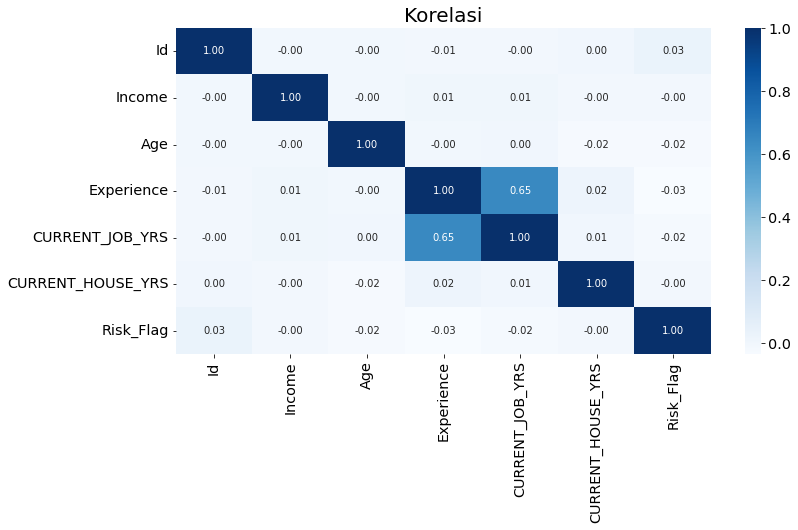

In [ ]:
heatmaps = sns.heatmap(df_2.corr(), cmap='Blues', annot=True, fmt='.2f')
heatmaps.set_title('Korelasi', fontdict={'fontsize': 20})

Pengamatan :


1. Antara Experience dan CURRENT_JOB_YRS cenderung multikolinearitas, akan dipilih salah satu saja untuk pemodelan ML nanti
2. Jika dibanding dengan Risk_Flag, maka Age dan Experience memiliki kaitan yang lebih kuat dibanding features lainnya.
3. dapat dilihat juga dari hasil pemetaan korelasi diatas bahwa sebagian besar feature memiliki korelasi yang rendah namun hal ini tidak akan mempengaruhi feature dalam memberikan predictive power nya ketika nanti dilakukan ML 
4. tidak ada features yang korealasinya diatas 0.8 atau -0.8





### 8.2 Pair Plot

<Figure size 1080x1080 with 0 Axes>

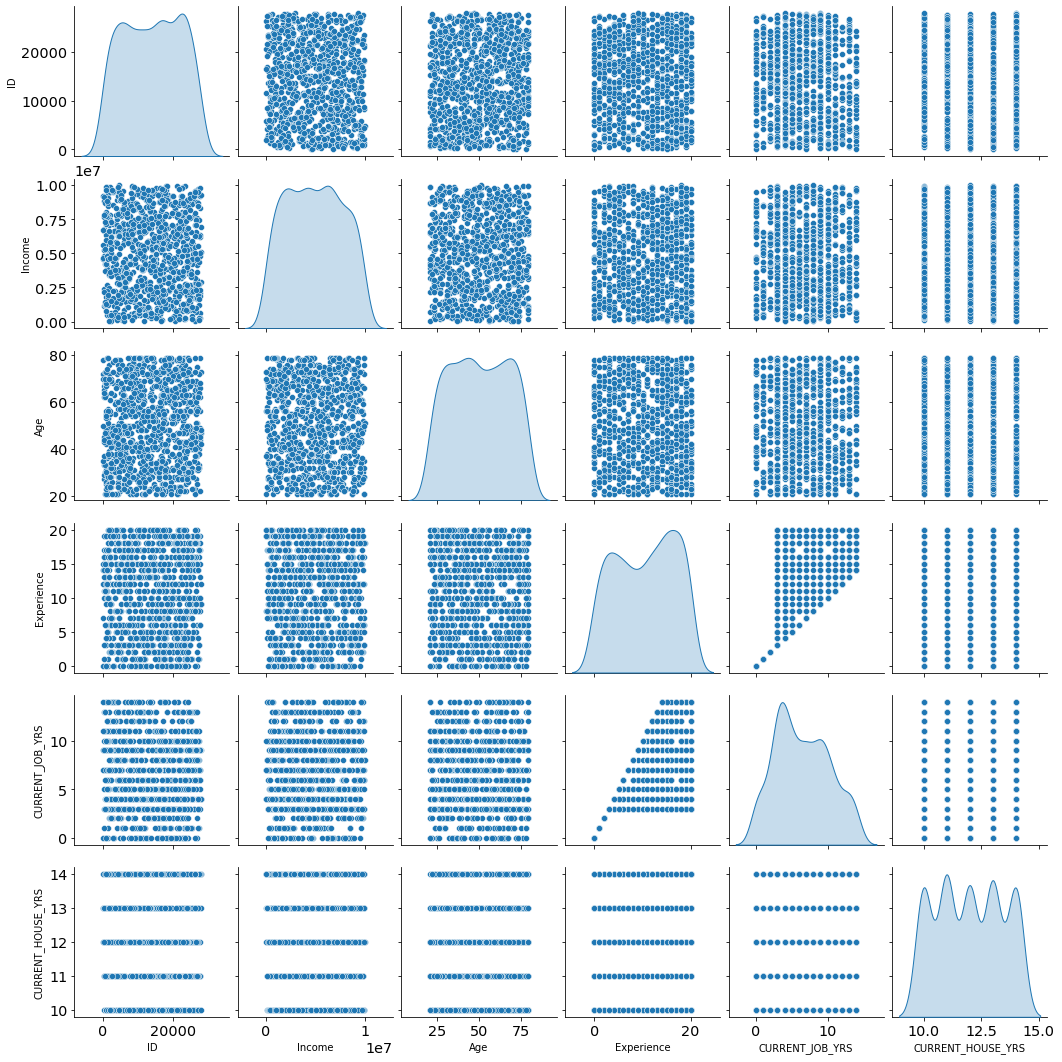

In [ ]:
plt.figure(figsize=(15, 15))
sns.pairplot(df_sample, diag_kind='kde')

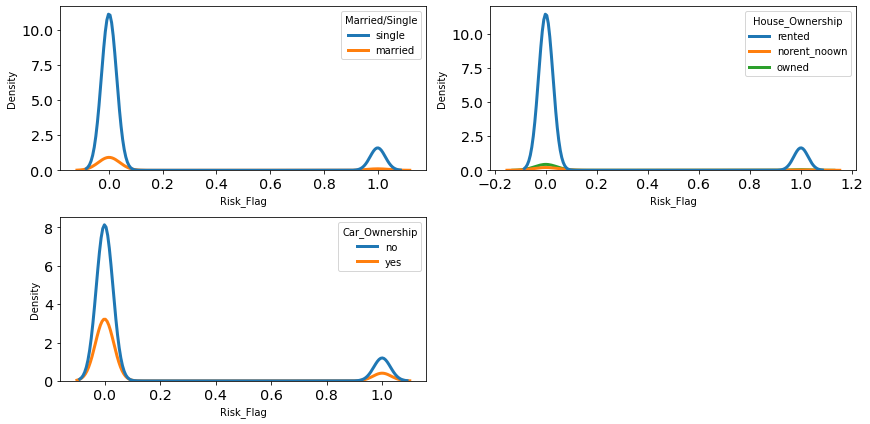

In [ ]:
cats1 = cats = ['Married/Single', 'House_Ownership', 'Car_Ownership']
features = cats1
for i in range(0, len(features)):
    plt.subplot(2, 2, i+1) 
    sns.kdeplot(data=df_2, x='Risk_Flag', hue=features[i])
    #plt.xlabel(features[i])
    plt.tight_layout()

## 9. Business Insight

### 9.1 Risk Flag by Income

In [ ]:
df_2.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [ ]:
df_2['Age_Cats'] = pd.cut(df_2.Age,
                 [0, 20, 40, np.inf],
                 labels=['teen','young','adult'])
df_2.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Age_Cats
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,young
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0,young
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0,adult
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1,adult
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,adult


In [ ]:
df_group = df_2.groupby(['Age_Cats','Risk_Flag']).agg({'Id':'count'}).reset_index()
df_group['ratio'] = df_group['Id'].apply(lambda x:round( x*100.0/(df_group['Id'].sum()),2))
df_group

,Age_Cats,Risk_Flag,Id,ratio
0,teen,0,0,0.00
1,teen,1,0,0.00
2,young,0,73959,29.35
3,young,1,11190,4.44
4,adult,0,147045,58.35
5,adult,1,19806,7.86


In [ ]:
young_percent = round(df_group['Id'][3]/(df_group['Id'][3]+df_group['Id'][2]),2)
young_percent = str(young_percent)+'%'
adult_percent = round(df_group['Id'][5]/(df_group['Id'][5]+df_group['Id'][4]),2)
adult_percent = str(adult_percent)+'%'

Text(-0.3, 120000, "Adult memiliki data paling banyak, akan tetapi persentase \n'Risk' lebih kecil dibanding Young ")

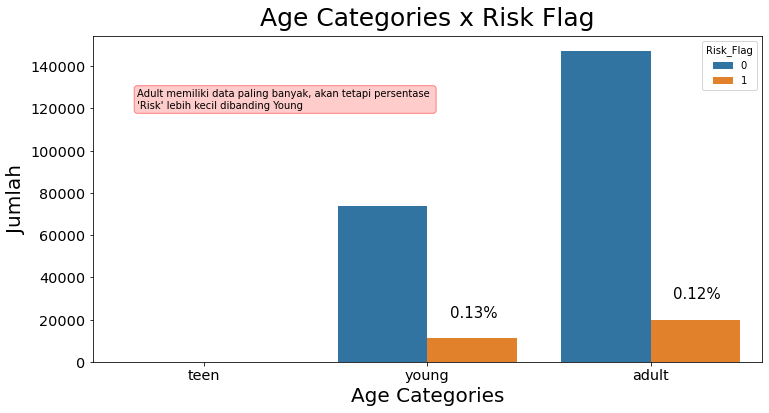

In [ ]:
conc1="Adult memiliki data paling banyak, akan tetapi persentase \n'Risk' lebih kecil dibanding Young "
sns.barplot(x='Age_Cats', y='Id', hue='Risk_Flag', data=df_group)
plt.ylabel('Jumlah', fontsize=20)
plt.xlabel('Age Categories', fontsize=20)
plt.title('Age Categories x Risk Flag', fontsize=25, pad=10)
plt.text(1.10,df_group['Id'][3]+10000,young_percent, fontsize=15)
plt.text(2.10,df_group['Id'][5]+10000,adult_percent, fontsize=15)
plt.text(-0.30,120000,conc1,bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   ))

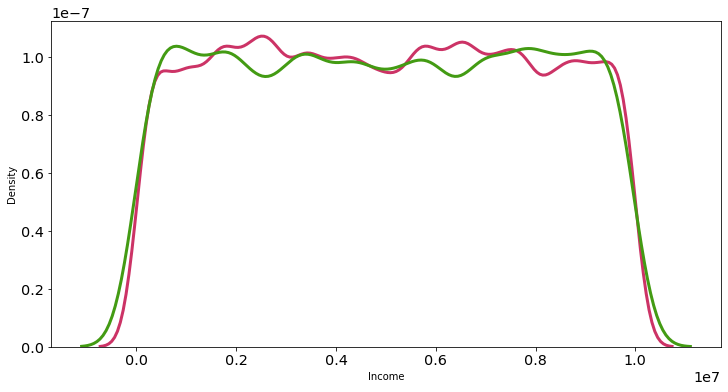

In [ ]:
sns.kdeplot(df_2[df_2['Risk_Flag'] == 0]['Income'], color='#cc3366', label='Income: Yes')
sns.kdeplot(df_2[df_2['Risk_Flag'] == 1]['Income'], color='#439b13', label='Income: No')

### 9.2 Risk Flag by Marital Status

In [ ]:
df_group2 = df_2.groupby(['Married/Single', 'Risk_Flag']).agg({'Id': 'count'}).reset_index()
df_group2['ration'] = df_group2['Id'].apply(lambda x:round( x*100.0/(df_group2['Id'].sum()),2))
df_group2 = df_group2.sort_values('Married/Single', ascending=False)
df_group2

,Married/Single,Risk_Flag,Id,ration
2,single,0,197912,78.54
3,single,1,28360,11.25
0,married,0,23092,9.16
1,married,1,2636,1.05


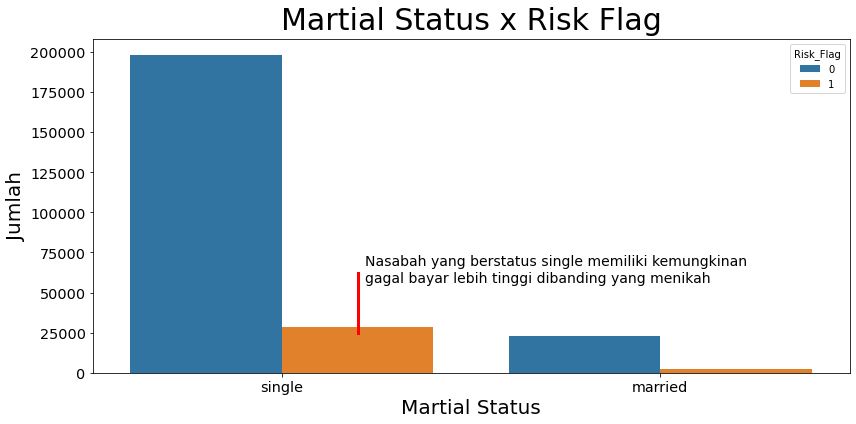

In [ ]:
keterangan2 = "Nasabah yang berstatus single memiliki kemungkinan \ngagal bayar lebih tinggi dibanding yang menikah"
sns.barplot (x='Married/Single', y ='Id',  hue='Risk_Flag', data = df_group2)
plt.title('Martial Status x Risk Flag', fontsize=30, pad=10)
plt.ylabel('Jumlah', fontsize=20)
plt.xlabel('Martial Status', fontsize=20)
plt.text(0.22,df_group2['Id'][3]*2,keterangan2, fontsize=14)
plt.axvline(0.2, color='red', linestyle='-', ymin=0.12, ymax=0.3)
plt.tight_layout()

### 9.3 Risk Flag by House Ownership

In [ ]:
df_group3 = df_2.groupby(['House_Ownership','Risk_Flag']).agg({'Id':'count'}).reset_index()
df_group3['ratio'] = df_group3['Id'].apply(lambda x:round( x*100.0/(df_group3['Id'].sum()),2))
df_group3 = df_group3.sort_values('House_Ownership', ascending=False)
df_group3

,House_Ownership,Risk_Flag,Id,ratio
4,rented,0,202777,80.47
5,rented,1,29121,11.56
2,owned,0,11758,4.67
3,owned,1,1160,0.46
0,norent_noown,0,6469,2.57
1,norent_noown,1,715,0.28


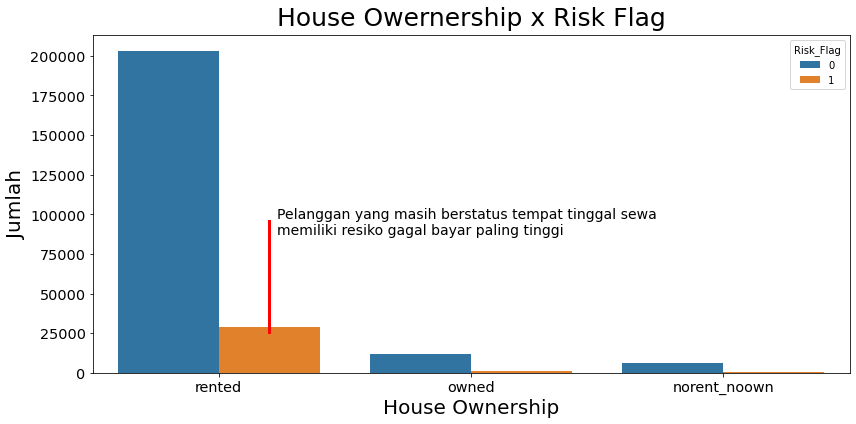

In [ ]:
keterangan = "Pelanggan yang masih berstatus tempat tinggal sewa \nmemiliki resiko gagal bayar paling tinggi"
sns.barplot(data=df_group3, x='House_Ownership', y='Id', hue='Risk_Flag')
plt.ylabel('Jumlah', fontsize=20)
plt.xlabel('House Ownership', fontsize=20)
plt.title('House Owernership x Risk Flag', fontsize=25,pad=10)
plt.axvline(0.2, color='red', linestyle='-', ymin=0.12, ymax=0.45)
plt.text(0.23,df_group3['Id'][5]*3,keterangan, fontsize=14)
plt.tight_layout()

### 9.4 Risk Flag by Car Ownership

In [ ]:
df_group4 = df_2.groupby(['Car_Ownership','Risk_Flag']).agg({'Id':'count'}).reset_index()
df_group4['ratio'] = df_group4['Id'].apply(lambda x:round( x*100.0/(df_group4['Id'].sum()),2))
df_group4

,Car_Ownership,Risk_Flag,Id,ratio
0,no,0,153439,60.89
1,no,1,22561,8.95
2,yes,0,67565,26.81
3,yes,1,8435,3.35


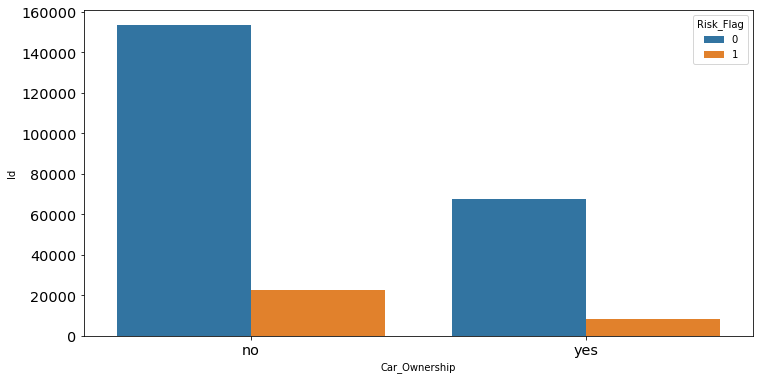

In [ ]:
sns.barplot(x='Car_Ownership', y='Id', hue='Risk_Flag', data=df_group4)

### 9.5 Risk Flag by Curren Job Years

In [ ]:
df_group5 = df_2.groupby(['CURRENT_JOB_YRS','Risk_Flag']).agg({'Id':'count'}).reset_index()
df_group5['ratio'] = df_group5['Id'].apply(lambda x:round( x*100.0/(df_group5['Id'].sum()),2))
df_group5.head()

,CURRENT_JOB_YRS,Risk_Flag,Id,ratio
0,0,0,9461,3.75
1,0,1,1582,0.63
2,1,0,9773,3.88
3,1,1,1802,0.72
4,2,0,9197,3.65


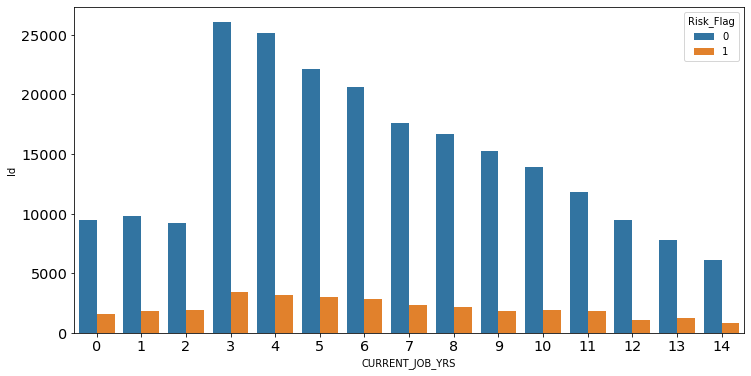

In [ ]:
sns.barplot(x='CURRENT_JOB_YRS', y='Id', hue='Risk_Flag', data=df_group5)

### 9.6 Risk Flag by Current House Years

In [ ]:
df_group6 = df_2.groupby(['CURRENT_HOUSE_YRS','Risk_Flag']).agg({'Id':'count'}).reset_index()
df_group6['ratio'] = df_group6['Id'].apply(lambda x:round( x*100.0/(df_group6['Id'].sum()),2))
df_group6

,CURRENT_HOUSE_YRS,Risk_Flag,Id,ratio
0,10,0,42592,16.90
1,10,1,6082,2.41
2,11,0,45390,18.01
3,11,1,6483,2.57
4,12,0,45487,18.05
5,12,1,6304,2.50
6,13,0,44477,17.65
7,13,1,6182,2.45
8,14,0,43058,17.09
9,14,1,5945,2.36


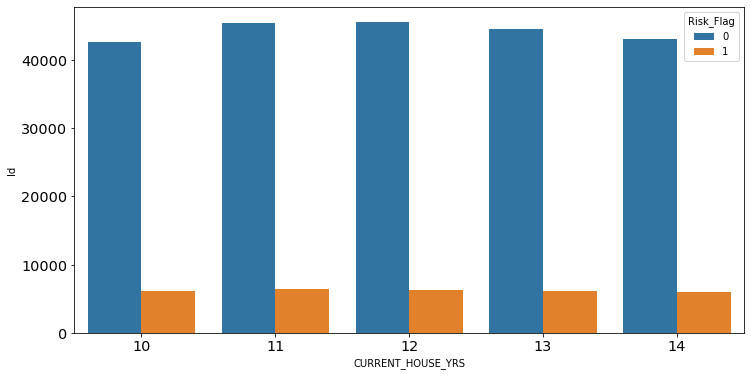

In [ ]:
sns.barplot(x='CURRENT_HOUSE_YRS', y='Id', hue='Risk_Flag', data=df_group6)

### 9.7 Risk Flag by Experience

In [ ]:
df_group7 = df_2.groupby(['Experience','Risk_Flag']).agg({'Id':'count'}).reset_index()
df_group7['ratio'] = df_group7['Id'].apply(lambda x:round( x*100.0/(df_group7['Id'].sum()),2))
df_group7.head()

,Experience,Risk_Flag,Id,ratio
0,0,0,9461,3.75
1,0,1,1582,0.63
2,1,0,9773,3.88
3,1,1,1802,0.72
4,2,0,9197,3.65


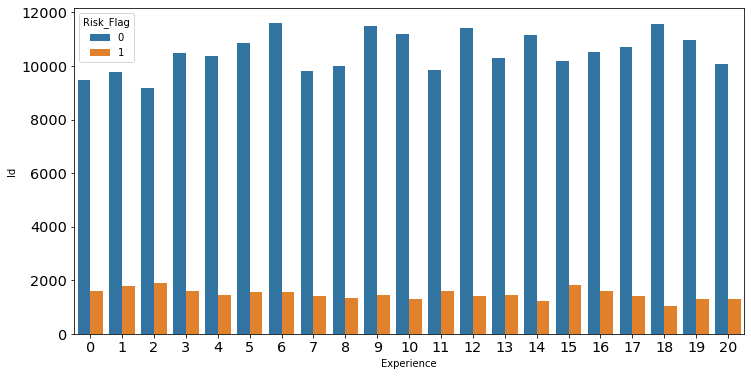

In [ ]:
sns.barplot(x='Experience', y='Id', hue='Risk_Flag', data=df_group7)

### 9.8 Summary Business Insight

1. Berdasarkan kolom Married/Single, data single lebih banyak daripada data married. Kita perlu meningkatkan jumlah pelanggan yang married.
2. Customer dengan usia lebih muda memiliki persentase risk lebih tinggi yaitu 13%
3. Customer yang masih berstatus menyewa tempat tinggal juga memiliki presentasi risk lebih besar dibanding dengan customer yang telah memiliki tempat tinggal 
4. Oleh karena itu akan lebih baik memprioritaskan customer yang memiliki kriteriai telah menikah dan customer dengan umur diatas 20th 


# Stage 2 - Data Preprocessing

## 1. Handle Missing Values

Missing value bukan  hanya secara definitif merupakan kolom yang kosong (null/nan), tapi juga bisa bermakna cara penulisan value yang tidak sesuai, seperti empty space didalam sebuah kolom. Oleh sebab itu perlu dilakukan pengecekan 2 lapis, yaitu pengecekan apakah ada empty space value dan apakah ada null/nan value didalam sebuah kolom.

In [ ]:
# Cara manual
df_2.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
Age_Cats             0
dtype: int64

In [ ]:
missing_value_columns = []

for i in df_2.columns:
    column_loop = df_2[i].unique().tolist()
    # Check 2 lapis
    # 1. Apakah ada empty space value didalam kolom
    # 2. Apakah ada nan/null value didalam kolom
    if " " in column_loop or sum([1 if str(x) == "nan" else 0 for x in column_loop]) > 0:
        missing_value_columns.append(i)

print(missing_value_columns)

[]


Setelah dilakukan pengecekan 2 lapis, tidak ditemukan adanya null/missing values pada tiap kolom.

In [ ]:
#https://stackoverflow.com/questions/27159189/find-empty-or-nan-entry-in-pandas-dataframe
np.where(df_2.applymap(lambda x: x == ''))

(array([], dtype=int64), array([], dtype=int64))

## 2. Handle Duplicated Data

Melakukan pengecekan apakah terdapat baris dan kolom yang terduplikasi atau tidak

In [ ]:
# Check apakah ada baris-baris terduplikat
df_2.duplicated().sum()

0

Tidak duplikasi dalam baris

In [ ]:
# Check apakah ada kolom-kolom yang terduplikat
df_2.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag', 'Age_Cats'],
      dtype='object')

Tidak duplikasi dalam kolom

## 3. Handle Unnecessary Value in 'CITY' column 

In [ ]:
# before handling
# Ada karakter-karakter yang tidak diperlukan seperti [10] pada beberapa baris
df_2['CITY'].head().reset_index()

,index,CITY
0,0,Rewa
1,1,Parbhani
2,2,Alappuzha
3,3,Bhubaneswar
4,4,Tiruchirappalli[10]


In [ ]:
# after handling
df_2['CITY'] = df_2['CITY'].map(lambda x: x.split("[")[0] if "[" in x else x)
df_2['CITY'].head().reset_index()

,index,CITY
0,0,Rewa
1,1,Parbhani
2,2,Alappuzha
3,3,Bhubaneswar
4,4,Tiruchirappalli


## 4. Handle Outliers

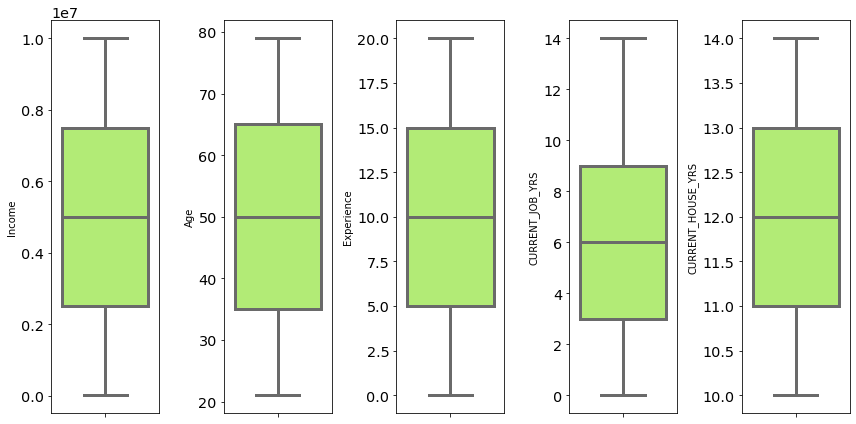

In [ ]:
features = nums
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df_3[features[i]], color='#B2FF62', orient='v')
    plt.tight_layout()

Berdasarkan visualisasi box plot, tidak ditemukan adanya outlier pada kolom numerikal

## 5. Feature Transformation

In [ ]:
df_2[nums].describe()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
count,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000
mean,4.997117e+06,49.954071,10.084437,6.333877,11.997794
std,2.878311e+06,17.063855,6.002590,3.647053,1.399037
min,1.031000e+04,21.000000,0.000000,0.000000,10.000000
25%,2.503015e+06,35.000000,5.000000,3.000000,11.000000
50%,5.000694e+06,50.000000,10.000000,6.000000,12.000000
75%,7.477502e+06,65.000000,15.000000,9.000000,13.000000
max,9.999938e+06,79.000000,20.000000,14.000000,14.000000


Berikut merupakan summary nya:

| Variabel | Skala Ukur | Strategi | Alasan | 
| -- | -- | -- |-- |
| Income | Nominal | Standarisasi | Karena mendekati distribusi normal, mean ~ median |
| Age | Ratio | Standarisasi | Karena mendekati distribusi normal, mean ~ median |
| Experience | Ratio | Standarisasi | Karena mendekati distribusi normal, mean ~ median |

## 6. Features Selection

In [ ]:
scaled_features = df.drop(labels=['Id','Age_Cats'], axis=1)
scaled_features.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli,Tamil_Nadu,3,14,1


## 7. Features Encoding 

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaled_features.columns

Index(['Income', 'Age', 'Experience', 'Married/Single', 'House_Ownership',
       'Car_Ownership', 'Profession', 'CITY', 'STATE', 'CURRENT_JOB_YRS',
       'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [ ]:
col_std = ['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']
features = scaled_features[col_std]

# Use scaler of choice; here Standard scaler is used
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

scaled_features[col_std] = features
scaled_features.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,-1.283145,-1.579604,-1.180232,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,-0.914131,0.716356,0
1,0.895457,-0.583344,-0.014067,single,rented,no,Software_Developer,Parbhani,Maharashtra,0.731036,0.716356,0
2,-0.349269,0.940348,-1.013637,married,rented,no,Technical_writer,Alappuzha,Kerala,-0.639936,-1.427981,0
3,0.437526,-0.524740,-1.346827,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,-1.188325,0.001577,1
4,0.268128,-0.173119,0.152528,single,rented,no,Civil_servant,Tiruchirappalli,Tamil_Nadu,-0.914131,1.431135,1


### 7.1 Label Encoding

In [ ]:
mapping_Married_Single = {
    'single' : 0,
    'married' : 1
}
mapping_Car_Ownership = {
    'no' : 0,
    'yes' : 1
}

scaled_features['Married/Single'] = scaled_features['Married/Single'].map(mapping_Married_Single)
scaled_features['Car_Ownership'] = scaled_features['Car_Ownership'].map(mapping_Car_Ownership)
scaled_features.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,-1.283145,-1.579604,-1.180232,0,rented,0,Mechanical_engineer,Rewa,Madhya_Pradesh,-0.914131,0.716356,0
1,0.895457,-0.583344,-0.014067,0,rented,0,Software_Developer,Parbhani,Maharashtra,0.731036,0.716356,0
2,-0.349269,0.940348,-1.013637,1,rented,0,Technical_writer,Alappuzha,Kerala,-0.639936,-1.427981,0
3,0.437526,-0.524740,-1.346827,0,rented,1,Software_Developer,Bhubaneswar,Odisha,-1.188325,0.001577,1
4,0.268128,-0.173119,0.152528,0,rented,0,Civil_servant,Tiruchirappalli,Tamil_Nadu,-0.914131,1.431135,1


### 7.2 One Hot Encoding

In [ ]:
for cats in ['House_Ownership']:
    onehots = pd.get_dummies(scaled_features[cats], prefix=cats)
    scaled_features = scaled_features.join(onehots)
scaled_features.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented
0,-1.283145,-1.579604,-1.180232,0,rented,0,Mechanical_engineer,Rewa,Madhya_Pradesh,-0.914131,0.716356,0,0,0,1
1,0.895457,-0.583344,-0.014067,0,rented,0,Software_Developer,Parbhani,Maharashtra,0.731036,0.716356,0,0,0,1
2,-0.349269,0.940348,-1.013637,1,rented,0,Technical_writer,Alappuzha,Kerala,-0.639936,-1.427981,0,0,0,1
3,0.437526,-0.524740,-1.346827,0,rented,1,Software_Developer,Bhubaneswar,Odisha,-1.188325,0.001577,1,0,0,1
4,0.268128,-0.173119,0.152528,0,rented,0,Civil_servant,Tiruchirappalli,Tamil_Nadu,-0.914131,1.431135,1,0,0,1


In [ ]:
scaled_features.drop('House_Ownership', axis=1, inplace=True)

In [ ]:
scaled_features.head()

,Income,Age,Experience,Married/Single,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented
0,-1.283145,-1.579604,-1.180232,0,0,Mechanical_engineer,Rewa,Madhya_Pradesh,-0.914131,0.716356,0,0,0,1
1,0.895457,-0.583344,-0.014067,0,0,Software_Developer,Parbhani,Maharashtra,0.731036,0.716356,0,0,0,1
2,-0.349269,0.940348,-1.013637,1,0,Technical_writer,Alappuzha,Kerala,-0.639936,-1.427981,0,0,0,1
3,0.437526,-0.524740,-1.346827,0,1,Software_Developer,Bhubaneswar,Odisha,-1.188325,0.001577,1,0,0,1
4,0.268128,-0.173119,0.152528,0,0,Civil_servant,Tiruchirappalli,Tamil_Nadu,-0.914131,1.431135,1,0,0,1


### 7.3 Frecuency Encoding

In [ ]:
FE_profession = scaled_features.groupby('Profession').size()/len(scaled_features)
scaled_features.loc[:,'Profession_FE'] = scaled_features['Profession'].map(FE_profession)

FE_city = scaled_features.groupby('CITY').size()/len(scaled_features)
scaled_features.loc[:,'CITY_FE'] = scaled_features['CITY'].map(FE_city)

FE_state = scaled_features.groupby('STATE').size()/len(scaled_features)
scaled_features.loc[:,'STATE_FE'] = scaled_features['STATE'].map(FE_state)

In [ ]:
scaled_features.drop(['Profession','CITY','STATE'], axis=1, inplace=True)
scaled_features.head()

,Income,Age,Experience,Married/Single,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented,Profession_FE,CITY_FE,STATE_FE
0,-1.283145,-1.579604,-1.180232,0,0,-0.914131,0.716356,0,0,0,1,0.020702,0.003167,0.056040
1,0.895457,-0.583344,-0.014067,0,0,0.731036,0.716356,0,0,0,1,0.020052,0.003369,0.101437
2,-0.349269,0.940348,-1.013637,1,0,-0.639936,-1.427981,0,0,0,1,0.020615,0.002730,0.023036
3,0.437526,-0.524740,-1.346827,0,1,-1.188325,0.001577,1,0,0,1,0.020052,0.002409,0.018484
4,0.268128,-0.173119,0.152528,0,0,-0.914131,1.431135,1,0,0,1,0.017512,0.003210,0.065623


# Stage 3 - Machine Learning

## 1. Test Function

In [ ]:
#test function
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def eval_classification(model, xtrain, ytrain, xtest, ytest):
    ypred = model.predict(xtest)
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, ypred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, ypred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, ypred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, ypred))
    
    y_pred_proba = model.predict_proba(xtest)
    print("AUC: %.2f" % roc_auc_score(ytest, y_pred_proba[:, 1]))

In [ ]:
X = scaled_features.drop('Risk_Flag', axis=1)
y = df['Risk_Flag']

In [ ]:
X.head()

,Income,Age,Experience,Married/Single,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented,Profession_FE,CITY_FE,STATE_FE
0,-1.283145,-1.579604,-1.180232,0,0,-0.914131,0.716356,0,0,1,0.020702,0.003167,0.056040
1,0.895457,-0.583344,-0.014067,0,0,0.731036,0.716356,0,0,1,0.020052,0.003369,0.101437
2,-0.349269,0.940348,-1.013637,1,0,-0.639936,-1.427981,0,0,1,0.020615,0.002730,0.023036
3,0.437526,-0.524740,-1.346827,0,1,-1.188325,0.001577,0,0,1,0.020052,0.002409,0.018484
4,0.268128,-0.173119,0.152528,0,0,-0.914131,1.431135,0,0,1,0.017512,0.003210,0.065623


## 2. Split data train & test before under/over sampling

In [ ]:
#run this if split first then smote
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, train_size = 0.7, random_state = 42)

## 3. Handling Data Imbalance

In [ ]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

X_under, y_under = under_sampling.RandomUnderSampler('all').fit_resample(X_train, y_train)
X_over, y_over = over_sampling.RandomOverSampler('all').fit_resample(X_train, y_train)
X_smote, y_smote = over_sampling.SMOTE('all').fit_resample(X_train, y_train)

In [ ]:
y_train.value_counts(), y_smote.value_counts()

(0    154675
 1     21725
 Name: Risk_Flag, dtype: int64, 0    154675
 1    154675
 Name: Risk_Flag, dtype: int64)

In [ ]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

X_sampling, y_sampling = over_sampling.SMOTE('all').fit_resample(X, y)

In [ ]:
from sklearn.model_selection import train_test_split 
X_smote, X_test, y_smote, y_test = train_test_split(X_sampling, 
                                                    y_sampling, 
                                                    test_size = 0.3, 
                                                    train_size = 0.7, 
                                                    random_state = 42)

In [ ]:
X_smote['Married/Single'].value_counts()

0    280718
1     28687
Name: Married/Single, dtype: int64

## 4. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_smote, y_smote)

LogisticRegression(random_state=42)

In [ ]:
eval_classification(model_lr, X_smote, y_smote, X_test, y_test)

Accuracy (Test Set): 0.55
Precision (Test Set): 0.54
Recall (Test Set): 0.59
F1-Score (Test Set): 0.57
AUC: 0.56


## 5. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_smote,y_smote)

DecisionTreeClassifier(random_state=42)

In [ ]:
eval_classification(model_dt, X_smote, y_smote, X_test, y_test)

Accuracy (Test Set): 0.92
Precision (Test Set): 0.88
Recall (Test Set): 0.96
F1-Score (Test Set): 0.92
AUC: 0.92


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model_dt_hyper = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='precision')
model_dt_hyper.fit(X_smote, y_smote)

# Predict & Evaluation
y_pred = model_dt_hyper.predict(X_test)#Check performa dari model
eval_classification(model_dt_hyper, X_smote, y_smote, X_test, y_test)

Accuracy (Test Set): 0.91
Precision (Test Set): 0.88
Recall (Test Set): 0.95
F1-Score (Test Set): 0.91
AUC: 0.93


## 6. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf = DecisionTreeClassifier(random_state=42)
model_rf.fit(X_smote,y_smote)

eval_classification(model_rf, X_smote, y_smote, X_test, y_test)

Accuracy (Test Set): 0.92
Precision (Test Set): 0.88
Recall (Test Set): 0.96
F1-Score (Test Set): 0.92
AUC: 0.92


## 7. XGBoost

In [ ]:
from xgboost import XGBClassifier
model_xg = XGBClassifier()
model_xg.fit(X_smote,y_smote)

eval_classification(model_xg, X_smote, y_smote, X_test, y_test)

Accuracy (Test Set): 0.65
Precision (Test Set): 0.66
Recall (Test Set): 0.64
F1-Score (Test Set): 0.65
AUC: 0.72


## 8. Lightgbm

In [ ]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()
lgbm.fit(X_smote, y_smote)
eval_classification(lgbm, X_smote, y_smote, X_test, y_test)

Accuracy (Test Set): 0.85
Precision (Test Set): 0.85
Recall (Test Set): 0.85
F1-Score (Test Set): 0.85
AUC: 0.92


In [ ]:
2*0.95 - 1

0.8999999999999999

## 9. CatBoost Classifier

In [ ]:
#install catboost
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier()
clf.fit(X_smote, y_smote)
eval_classification(clf, X_smote, y_smote, X_test, y_test)

Learning rate set to 0.119231
0:	learn: 0.6878872	total: 115ms	remaining: 1m 54s
1:	learn: 0.6790194	total: 181ms	remaining: 1m 30s
2:	learn: 0.6757842	total: 239ms	remaining: 1m 19s
3:	learn: 0.6725158	total: 296ms	remaining: 1m 13s
4:	learn: 0.6691017	total: 360ms	remaining: 1m 11s
5:	learn: 0.6672509	total: 484ms	remaining: 1m 20s
6:	learn: 0.6652109	total: 579ms	remaining: 1m 22s
7:	learn: 0.6632128	total: 674ms	remaining: 1m 23s
8:	learn: 0.6602162	total: 823ms	remaining: 1m 30s
9:	learn: 0.6558029	total: 967ms	remaining: 1m 35s
10:	learn: 0.6539005	total: 1.14s	remaining: 1m 42s
11:	learn: 0.6499704	total: 1.24s	remaining: 1m 42s
12:	learn: 0.6485149	total: 1.3s	remaining: 1m 38s
13:	learn: 0.6463950	total: 1.37s	remaining: 1m 36s
14:	learn: 0.6433469	total: 1.44s	remaining: 1m 34s
15:	learn: 0.6419525	total: 1.5s	remaining: 1m 32s
16:	learn: 0.6408825	total: 1.56s	remaining: 1m 30s
17:	learn: 0.6395214	total: 1.63s	remaining: 1m 28s
18:	learn: 0.6381136	total: 1.69s	remaining: 1

## 10.Features Important

In [ ]:
#from xgboost import plot_importance

#plot_importance(model_xg)
#plt.show()

In [ ]:
df_feature = pd.DataFrame({"feature_names":X_smote.keys(),
              "feature_importance":clf.get_feature_importance()})
df_feature = df_feature.sort_values(["feature_importance"],ascending=False)
df_feature.head()

,feature_names,feature_importance
12,STATE_FE,30.318106
10,Profession_FE,13.252081
0,Income,10.770900
5,CURRENT_JOB_YRS,10.303770
11,CITY_FE,10.064579


<AxesSubplot:xlabel='feature_importance', ylabel='feature_names'>

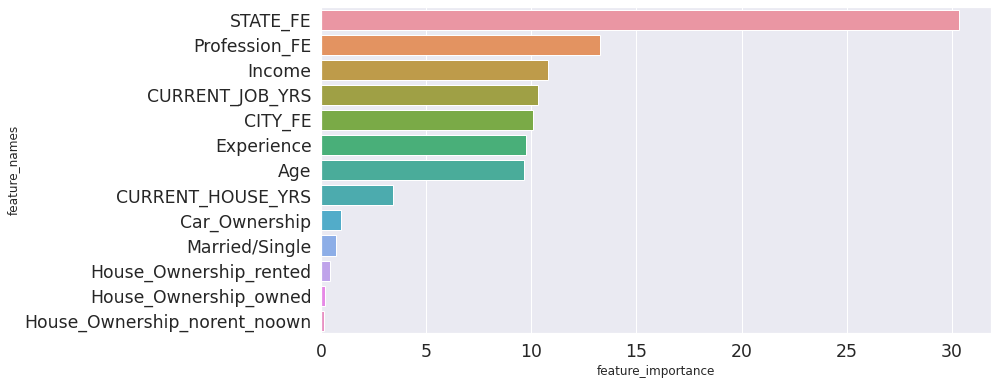

In [ ]:
sns.barplot(x='feature_importance', y='feature_names', data=df_feature, orient='h')

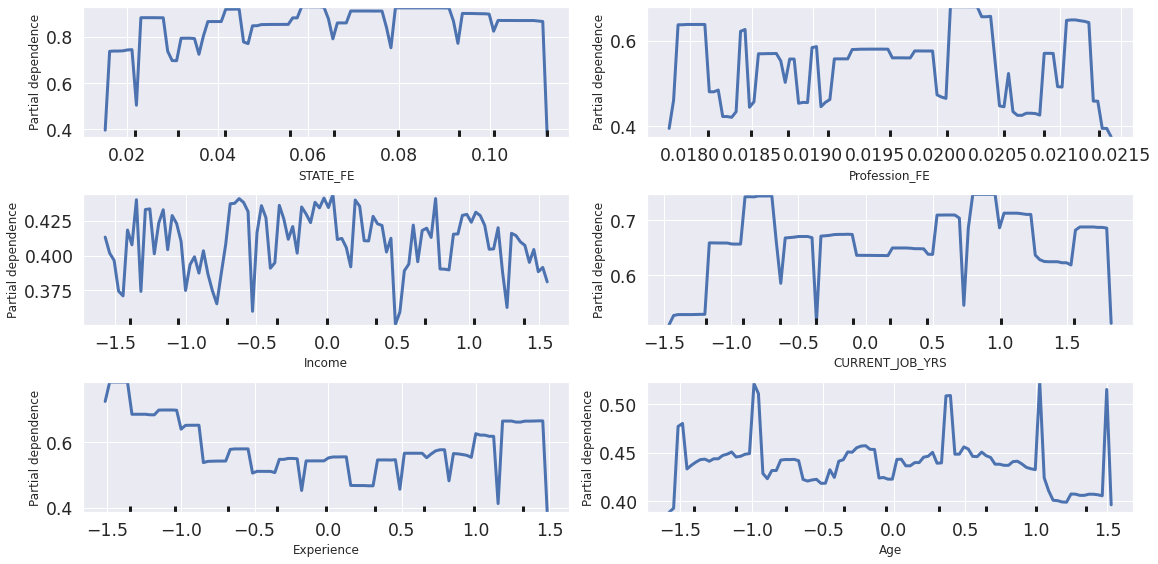

In [ ]:
from sklearn.inspection import plot_partial_dependence

# We try to compare 4 features using partial dependence
fig, ax = plt.subplots(3,2, figsize=(16, 8))
plot_partial_dependence(clf, X_smote,["STATE_FE"], ax=ax[0,0])
plot_partial_dependence(clf, X_smote,["Profession_FE"], ax=ax[0,1])
plot_partial_dependence(clf, X_smote,["Income"], ax=ax[1,0])
plot_partial_dependence(clf, X_smote,["CURRENT_JOB_YRS"], ax=ax[1,1])
plot_partial_dependence(clf, X_smote,["Experience"], ax=ax[2,0])
plot_partial_dependence(clf, X_smote,["Age"], ax=ax[2,1])
plt.tight_layout()
plt.show()

In [ ]:
20 - 80

1 = 20 - 30
2 = 31 - 40
3 = 31 - 40
4 = 

## 11. Risk Flag Simulation

In [ ]:
np.random.seed(3000)
df_random = scaled_features[scaled_features["Risk_Flag"]==1].sample(50)
y_pred_simul = clf.predict(df_random.drop(["Risk_Flag"],axis=1))
print(f"{sum(y_pred_simul), len(y_pred_simul)}")

In [ ]:
df_random2 = df_random.copy()
df_random2["Age"] = 0.4
df_random2["Age"] = 0.4
df_random2["Age"] = 0.4

y_pred_simul = clf.predict(df_random2.drop(["Risk_Flag"],axis=1))
print(f"{sum(y_pred_simul), len(y_pred_simul)}")

In [ ]:
#install shap
!pip install shap

In [ ]:
import shap

shap_values = shap.TreeExplainer(clf,
                                 data = X_smote,
                                 feature_dependence="independent",
                                 model_output="probability").shap_values(X_smote)
shap.summary_plot(shap_values, X_smote,feature_names = X_smote.columns)

In [ ]:
explainer = shap.TreeExplainer(model_xg)
#shap_values = explainer.shap_values(X)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[1,:], X_test.iloc[0,:])

observation :
1. Chart show there are 8 variables important for XGBoost.
2. 5 low variables will be exclude 

## 12. Machine Learning with Features Selection

In [ ]:
X_smote_fs = X_smote.drop(['Car_Ownership','Married/Single','House_Ownership_norent_noown','House_Ownership_owned',
                    'House_Ownership_rented'], axis=1)
X_test_fs = X_test.drop(['Car_Ownership','Married/Single','House_Ownership_norent_noown','House_Ownership_owned',
                    'House_Ownership_rented'], axis=1)

In [ ]:
X_smote_fs.head()

### 12.1 Random Forest with FS

In [ ]:
model_rf_fs = DecisionTreeClassifier(random_state=42)
model_rf_fs.fit(X_smote_fs,y_smote)

eval_classification(model_rf_fs, X_smote_fs, y_smote, X_test_fs, y_test)

In [ ]:
exp_rf = shap.TreeExplainer(model_rf_fs)
shap_values_fs = shap.TreeExplainer(model_rf_fs,
                                 data = X_smote_fs,
                                 feature_dependence="independent",
                                 model_output="probability").shap_values(X_smote_fs)

In [ ]:
shap.initjs()
shap.force_plot(exp_rf.expected_value, shap_values_fs[1,:], X_test_fs.iloc[0,:])

In [ ]:
#X_test_fs.iloc[0,:]
shap_values[1,:]

### 12.2 XGBoost with FS

In [ ]:
from xgboost import XGBClassifier
xg_fs = XGBClassifier()
xg_fs.fit(X_smote_fs,y_smote)

eval_classification(xg_fs, X_smote_fs, y_smote, X_test_fs, y_test)

### 12.3 Catboost with FS

In [ ]:
from catboost import CatBoostClassifier

clf_fs = CatBoostClassifier()
clf_fs.fit(X_smote_fs, y_smote)
eval_classification(clf_fs, X_smote_fs, y_smote, X_test_fs, y_test)

In [ ]:
print_confusion_matrix(confusion_matrix(y_test, real_prediksi),class_names=["Gagal Bayar", "Tidak Gagal Bayar"])
print(classification_report(y_test, real_prediksi))